In [1]:
%matplotlib inline
import os,sys,inspect
PATH = "/Users/david/Desktop/DM2 project/fma_metadata"
sys.path.insert(0, PATH)

import pandas as pd
import numpy as np
import utils
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('always')   #suppresses all warnings
warnings.filterwarnings('ignore')

In [2]:
tracks = utils.load("/Users/david/Desktop/DM2 project/fma_metadata/tracks.csv")
echonest= utils.load("/Users/david/Desktop/DM2 project/fma_metadata/echonest.csv")
features = utils.load("/Users/david/Desktop/DM2 project/fma_metadata/features.csv")

In [4]:
import librosa
from sklearn.preprocessing import minmax_scale   #11025

def normalize(x, axis=0):
    return minmax_scale(x, axis=axis)

ts,sr = librosa.load("/Users/david/Downloads/fma_medium/000/000148.mp3",offset=10.0, duration=10, sr=11050)
spect = librosa.feature.spectral_centroid(ts, sr=sr)[0]

Text(0.5, 0, 'seconds')

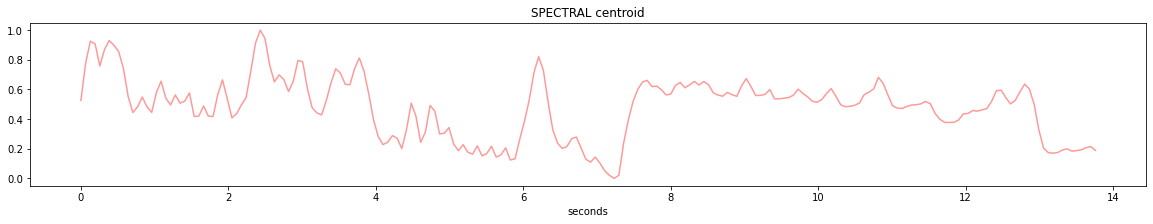

In [5]:
plt.figure(figsize=(20,3))
plt.title('SPECTRAL centroid')
e_time = np.arange(len(normalize(spect)))*512/8000
plt.plot(e_time, normalize(spect), color='r', alpha=0.4)
plt.xlabel('seconds')

# Build Dataset

We build a dataset with features extracted from the mp3.
Audio Wave 10 seconds after first 10 seconds.
Spectral centroid 10 seconds after first 10 seconds.

In [6]:
import librosa
from os import listdir
from tqdm import tqdm
from sklearn.preprocessing import minmax_scale
import warnings
warnings.filterwarnings("ignore")

def normalize(x, axis=0):
    return minmax_scale(x, axis=axis)         # normalize the Spectral centroid wave

# path folder with .mp3 data
path = "/Users/david/Downloads/fma_medium/"                  

list_ts_spect_centroid = []  #list of spectral centroid Time Series
list_ts = []  # list raw wave Time Series
track_ids = [] # list of time series indexes 

for folder in listdir(path):
    if folder != 'checksums' and folder !='README.txt':       # ignores irrelevant files
        for track_num in tqdm(listdir( path +'/'+ folder)):
            if track_num != ".DS_Store" and track_num != 'checksums' and track_num !='README.txt':  # ignore irrelevant files 
                track_id = track_num.replace('.mp3', '').lstrip('0')  # format track_id 
                track_path = path +'/'+ folder +'/' + track_num                   
                
                try:                                                               # skip corrupted .mp3s 
                    # extract wave TS
                    ts, sr = librosa.load(track_path, duration=28, sr=22050)                           
                    #append time series
                    list_ts.append(ts)
                    track_ids.append(track_id)
                    # compute spectral ts
                    spect = librosa.feature.spectral_centroid(ts, sr=sr)[0]
                    # normalize spectral_centroi
                    spect = normalize(spect)                                                      
                    # append spectral ts
                    list_ts_spect_centroid.append(spect)
                except:
                    continue

100%|██████████████████████████████████████████████████████████████████████████████████| 39/39 [01:27<00:00,  2.23s/it]
0it [00:00, ?it/s]
100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.39s/it]
0it [00:00, ?it/s]
100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:56<00:00,  2.02s/it]


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:27<00:00,  1.97s/it]
0it [00:00, ?it/s]
100%|████████████████████████████████████████████████████████████████████████████████| 156/156 [00:33<00:00,  4.64it/s]


# Save Dataset Spectral Centroid time series

In [7]:
# create dataframe - spectral centroid time series
ts_spectral_df = pd.DataFrame(data=list_ts_spect_centroid, index=track_ids)

#--------------------------------------- Pre-processing ----------------------------------------------#

# rename index to "track_id"
ts_spectral_df.index.names = ['track_id']
# remove NaN values - some tracks are few sec longer --> I set all tracks to equal length 3597
ts_spectral_df.dropna(axis=1, inplace=True)
# temporarly reset index
ts_spectral_df.reset_index(inplace=True)
# change type index from object to int
ts_spectral_df['track_id'] = ts_spectral_df['track_id'].astype(int)
# set track_id as index
ts_spectral_df.set_index('track_id', inplace=True)
# change columns type from object to float
columns = ts_spectral_df.columns
for col in columns:
    ts_spectral_df[col] = ts_spectral_df[col].astype(float)
    
#-----------------------------------------------------------------------------------------------------#

ts_spectral_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1196,1197,1198,1199,1200,1201,1202,1203,1204,1205
track_id,,,,,,,,,,,,,,,,,,,,,
148,0.179404,0.185908,0.194919,0.267505,0.280505,0.294268,0.281828,0.333020,0.374387,0.358012,...,0.495307,0.470147,0.483129,0.491965,0.472263,0.491776,0.480190,0.503967,0.500774,0.497112
237,0.133888,0.225544,0.300802,0.311688,0.307265,0.304860,0.348167,0.461615,0.517444,0.618659,...,0.825822,0.760108,0.607031,0.623963,0.766678,0.854057,0.875452,0.837235,0.813575,0.786520
458,0.659132,0.535371,0.397943,0.308906,0.325826,0.314305,0.285952,0.262106,0.204989,0.236036,...,0.318043,0.305574,0.297776,0.258070,0.145286,0.189159,0.266729,0.269988,0.276952,0.370088
459,0.000000,0.154945,0.238087,0.228944,0.177237,0.175010,0.216251,0.192408,0.384064,0.750302,...,0.500272,0.360106,0.318147,0.590711,0.738984,0.647391,0.526201,0.367045,0.237850,0.296326
550,0.042518,0.030067,0.007602,0.008407,0.025658,0.058638,0.063999,0.065895,0.069185,0.261017,...,0.344651,0.331682,0.304599,0.221120,0.127218,0.076240,0.035515,0.024802,0.028929,0.013140


In [8]:
ts_spectral_df.shape

(5409, 1206)

In [9]:
# Dataset info
print(f"___Partition MEDIUM - spectralcentroid___\nNumber of time series (tracks):{ts_spectral_df.shape[0]}\nLength of time series(columns): {ts_spectral_df.shape[1]}")

___Partition MEDIUM - spectralcentroid___
Number of time series (tracks):5409
Length of time series(columns): 1206


In [10]:
#save dataset - spectral centroid time series: 28 sec, 22050sr, hop_lenght=512
with open('ts_centroid_dataset.csv', mode='w') as dataset:
    dataset.write(ts_spectral_df.to_csv())

# Save Dataset raw wave time series

In [8]:
# create dataframe raw - time series
ts_df = pd.DataFrame(data=list_ts, index=track_ids)

In [9]:
#--------------------------------------- Pre-processing ----------------------------------------------#

# rename index to "track_id"
ts_df.index.names = ['track_id']
# remove NaN values - some tracks are few sec longer --> I set all tracks to equal length 3597
ts_df.dropna(axis=1, inplace=True)
# temporarly reset index
ts_df.reset_index(inplace=True)
# change type index from object to int
ts_df['track_id'] = ts_df['track_id'].astype(int)
# set track_id as index
ts_df.set_index('track_id', inplace=True)
# change columns type from object to float
columns = ts_df.columns
for col in columns:
    ts_df[col] = ts_df[col].astype(float)
    
#-----------------------------------------------------------------------------------------------------#

ts_df.head()

,0,1,2,3,4,5,6,7,8,9,...,39990,39991,39992,39993,39994,39995,39996,39997,39998,39999
track_id,,,,,,,,,,,,,,,,,,,,,
136,0.213252,0.430512,0.449565,0.376643,0.123706,-0.027533,-0.017585,-0.036715,-0.115963,-0.049042,...,0.264413,0.426391,0.645346,0.406505,0.216541,0.125446,-0.093174,-0.353438,-0.228140,-0.151263
148,0.161876,0.506465,0.395861,0.413054,0.623042,0.711314,0.683975,0.771512,0.932528,0.800494,...,0.513661,0.399554,0.214683,-0.102356,-0.283024,-0.347243,-0.380748,-0.298486,-0.146687,-0.092805
237,-0.095121,-0.101496,-0.108052,-0.342283,-0.485754,-0.306796,-0.080318,-0.123418,-0.179612,-0.329415,...,-0.496772,-0.631864,-0.659096,-0.511799,-0.175903,-0.186838,-0.088933,-0.120654,-0.323889,-0.124359
458,0.082232,0.245004,0.316531,0.332518,0.038145,0.013611,-0.083282,-0.313579,-0.140621,-0.257145,...,-0.262334,-0.376725,-0.352727,-0.377454,-0.095116,-0.432229,-0.233017,-0.133089,-0.467969,-0.170692
459,-0.437805,-0.851523,-0.782280,-0.712874,-0.452488,-0.384521,-0.411936,-0.523089,-0.445968,-0.403546,...,-0.590044,-0.135520,-0.173987,-0.345714,-0.439428,-0.293860,-0.155816,-0.387047,-0.247352,-0.156705


In [10]:
# Dataset info
print(f"___Partition MEDIUM - Raw wave___\nNumber of time series (tracks):{ts_df.shape[0]}\nLength of time series(columns): {ts_df.shape[1]}")

___Partition MEDIUM - Raw wave___
Number of time series (tracks):6778
Length of time series(columns): 40000


In [ ]:
# save dataset - raw time series
with open('ts_raw_dataset.csv', mode='w') as dataset:
    dataset.write(ts_df.to_csv())